In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from dev import ESOINN
from dev.tests import UnitTest
from dev.commons import Plotter
from dev.mock import load_input_signals
# from dev.mock import Graph, Node, load_mock, save_mock

### Auto tests

In [2]:
test_nn = ESOINN.EnhancedSelfOrganizingIncrementalNN([[1, 1], [1, 1]])
unit_test = UnitTest(test_nn)
res = unit_test.run_tests(1000)

2017-05-01 00:02:14,180 - dev.tests.UnitTest - DEBUG - 0.84989452	for 1000 find_winners
2017-05-01 00:02:14,188 - dev.tests.UnitTest - DEBUG - 0.00457910	for 1000 find_neighbors
2017-05-01 00:02:14,752 - dev.tests.UnitTest - DEBUG - 0.55842526	for 1000 calc_threshold
2017-05-01 00:02:14,776 - dev.tests.UnitTest - DEBUG - 0.02130044	for 1000 update_edges_age
2017-05-01 00:02:15,068 - dev.tests.UnitTest - DEBUG - 0.28756667	for 1000 update_node_points
2017-05-01 00:02:15,380 - dev.tests.UnitTest - DEBUG - 0.29341456	for 1000 update_node_density
2017-05-01 00:02:15,564 - dev.tests.UnitTest - DEBUG - 0.16061928	for 1000 update_feature_vectors
2017-05-01 00:02:15,620 - dev.tests.UnitTest - DEBUG - 0.04979881	for 1000 remove_old_ages
2017-05-01 00:02:15,820 - dev.tests.UnitTest - DEBUG - 0.19818606	for 1000 calc_mean_density_in_subclass
2017-05-01 00:02:16,016 - dev.tests.UnitTest - DEBUG - 0.19393196	for 1000 calc_alpha
2017-05-01 00:02:16,436 - dev.tests.UnitTest - DEBUG - 0.39395257	for 1

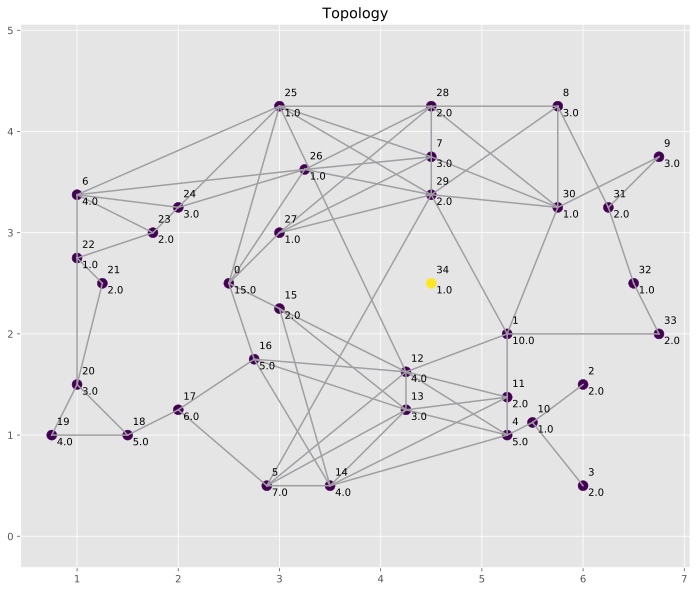

In [3]:
unit_test.display_info(plot=True)
# test_nn.current_state()

### Manual tests

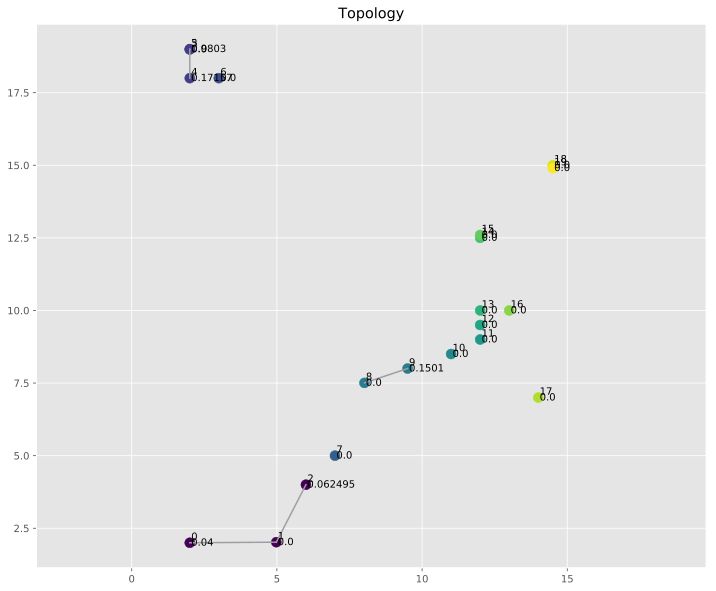

2017-05-01 00:02:20,092 - dev.commons.Plotter - WARNING - No edges


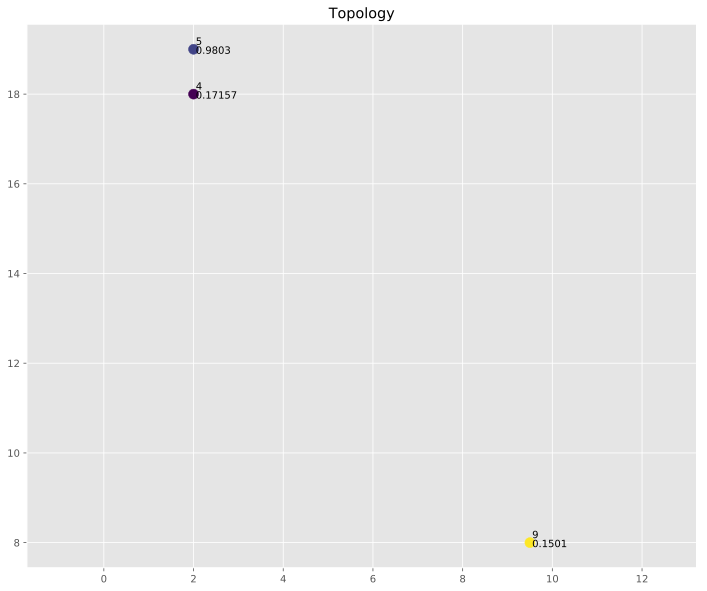

In [4]:
TRACE = False
SEPARATE_PLOTS = False

nn = ESOINN.EnhancedSelfOrganizingIncrementalNN(
    init_nodes=[[1, 2], [5, 2]],
)
signals = load_input_signals()

plotter = Plotter(nn)

nn.fit(signals)
plotter.display_info(plot=True, separate_show=SEPARATE_PLOTS, log=TRACE)

# # test for predictions
# nn.predict([3, 15])

# # test for old edge removal
# nn.edges[(0,1)] = 51
# nn.remove_old_ages()
# plotter.display_edges(log=True)

# test for noize removal
nn.remove_noise()
plotter.display_info(plot=True, separate_show=SEPARATE_PLOTS, log=TRACE)

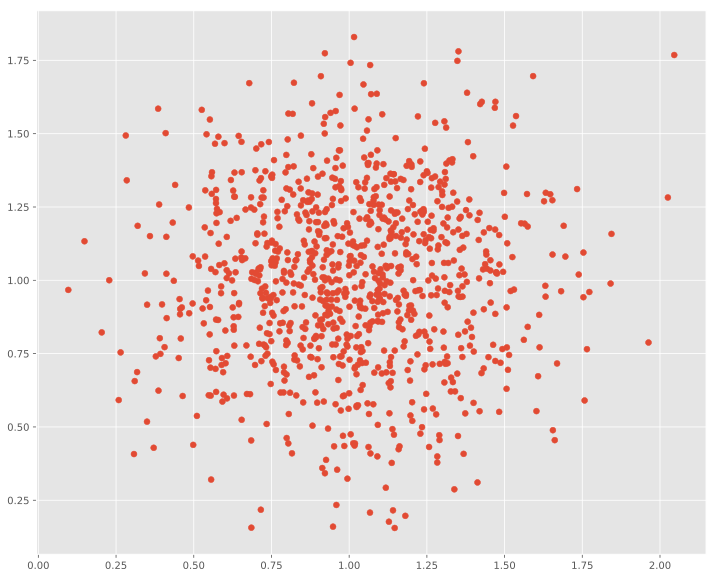

In [23]:
samples = []
random.seed(123)
params = {
    'mu': 1,
    'sigma': 0.3
}
for i in range(1000):
    samples.append((random.gauss(**params), random.gauss(**params)))
samples = np.array(samples)
samples.shape
plt.scatter(samples[:, 0], samples[:, 1]);